In [5]:
import pathlib
from PIL import Image
import google.generativeai as genai
import os
from google.colab import userdata

In [6]:
# Check for GOOGLE_API_KEY
API_KEY = userdata.get('GOOGLE_API_KEY')
if not API_KEY:
    raise EnvironmentError("Error: GOOGLE_API_KEY not found in the environment variables. Please set it in the .env file.")
else:
    # Configure Google API with the secret GOOGLE_API_KEY
    genai.configure(api_key=API_KEY)

In [7]:
# Generation configuration
generation_config = {
    "temperature": 1,
    "top_p": 0.95,
    "top_k": 64,
    "max_output_tokens": 8192,
    "response_mime_type": "text/plain",
}


In [8]:
# Safety settings
safety_settings = [
    {"category": "HARM_CATEGORY_HARASSMENT", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_HATE_SPEECH", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_SEXUALLY_EXPLICIT", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_DANGEROUS_CONTENT", "threshold": "BLOCK_NONE"},
]


In [9]:
# Model name
MODEL_NAME = "gemini-1.5-pro-latest"

In [10]:

# Framework selection
framework = "Regular CSS use flex grid etc"  # Change this to "Bootstrap" or any other framework as needed


In [11]:
# Create the model
model = genai.GenerativeModel(
    model_name=MODEL_NAME,
    safety_settings=safety_settings,
    generation_config=generation_config,
)

In [12]:
# Start a chat session
chat_session = model.start_chat(history=[])


In [13]:
# Function to send a message to the model
def send_message_to_model(message, image_path):
    image_input = {
        'mime_type': 'image/jpeg',
        'data': pathlib.Path(image_path).read_bytes()
    }
    response = chat_session.send_message([message, image_input])
    return response.text


In [14]:

def main():
    # File input for image
    print("Upload an image file for analysis:")
    image_path = input("Enter the path to the image (e.g., ./image.jpg): ").strip()

    if not os.path.exists(image_path):
        print("Error: The specified file does not exist.")
        return

    try:
        # Load and display the image
        image = Image.open(image_path)
        image.show()

        # Convert image to RGB mode if it has an alpha channel
        if image.mode == 'RGBA':
            image = image.convert('RGB')

        # Save the uploaded image temporarily
        temp_image_path = pathlib.Path("temp_image.jpg")
        image.save(temp_image_path, format="JPEG")

        # Generate UI description
        print("🧑‍💻 Looking at your UI...")
        prompt = "Describe this UI in accurate details. When you reference a UI element put its name and bounding box in the format: [object name (y_min, x_min, y_max, x_max)]. Also Describe the color of the elements."
        description = send_message_to_model(prompt, temp_image_path)
        print("\nInitial Description:\n", description)

        # Refine the description
        print("\n🔍 Refining description with visual comparison...")
        refine_prompt = f"Compare the described UI elements with the provided image and identify any missing elements or inaccuracies. Also Describe the color of the elements. Provide a refined and accurate description of the UI elements based on this comparison. Here is the initial description: {description}"
        refined_description = send_message_to_model(refine_prompt, temp_image_path)
        print("\nRefined Description:\n", refined_description)

        # Generate HTML
        print("\n🛠️ Generating website...")
        html_prompt = f"Create an HTML file based on the following UI description, using the UI elements described in the previous response. Include {framework} CSS within the HTML file to style the elements. Make sure the colors used are the same as the original UI. The UI needs to be responsive and mobile-first, matching the original UI as closely as possible. Do not include any explanations or comments. Avoid using ```html. and ``` at the end. ONLY return the HTML code with inline CSS. Here is the refined description: {refined_description}"
        initial_html = send_message_to_model(html_prompt, temp_image_path)
        print("\nInitial HTML Code:\n")
        print(initial_html)

        # Refine HTML
        print("\n🔧 Refining website...")
        refine_html_prompt = f"Validate the following HTML code based on the UI description and image and provide a refined version of the HTML code with {framework} CSS that improves accuracy, responsiveness, and adherence to the original design. ONLY return the refined HTML code with inline CSS. Avoid using ```html. and ``` at the end. Here is the initial HTML: {initial_html}"
        refined_html = send_message_to_model(refine_html_prompt, temp_image_path)
        print("\nRefined HTML Code:\n")
        print(refined_html)

        # Save the refined HTML to a file
        with open("index.html", "w") as file:
            file.write(refined_html)
        print("\n✅ HTML file 'index.html' has been created successfully.")

    except Exception as e:
        print(f"An error occurred: {e}")


In [24]:
if __name__ == "__main__":
    main()

Upload an image file for analysis:
Enter the path to the image (e.g., ./image.jpg): input.png
🧑‍💻 Looking at your UI...

Initial Description:
 The UI consists of five distinct cards arranged horizontally, each presenting a key benefit.  They sit on a muted, dusty rose background (`#F2EAE2`). Each card has rounded corners, a light beige/cream background (`#FFF8F0`), a black icon within a subtly rounded square of the same beige/cream, a bold title, and a descriptive paragraph in regular black text.

**1. Personalized Learning for Students (117, 35, 854, 198)**

*   **Icon (169, 79, 272, 150):**  Black icon of a projection screen with a play symbol (indicating video) and three simplified figures representing students seated in front. The icon is housed within a light beige/cream, softly rounded square.
*   **Title (353, 35, 418, 172):** "Personalized Learning for Students" in bold black.
*   **Description (580, 35, 854, 185):** "Fosters individual growth by creating personalized learning 

Displaying the input UI/image


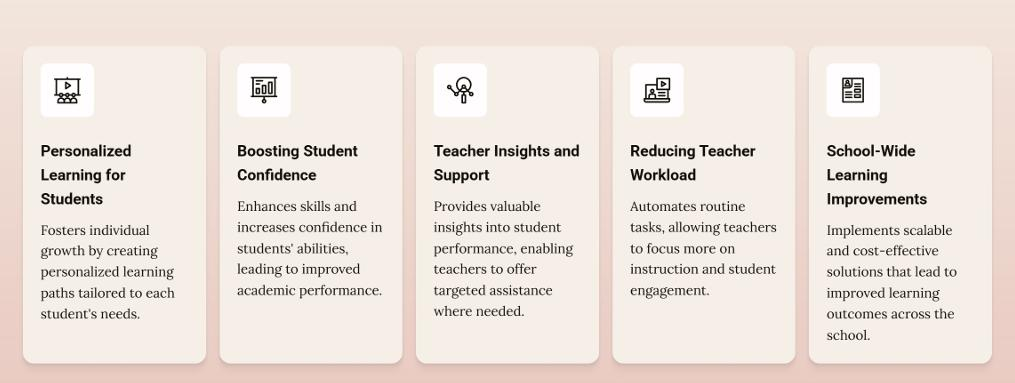

In [31]:
from IPython.display import display
image = Image.open('/content/temp_image.jpg')
display(image)


Displaying the UI/image made by generated html code

In [25]:
from IPython.display import display, HTML

# Path to your HTML file
html_file_path = "./index.html"
3
# Open and display the HTML file
with open(html_file_path, "r") as html_file:
    html_content = html_file.read()

# Render the HTML inline
display(HTML(html_content))
